In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from skgstat import Variogram


sys.path.append("../../modules/")
import geostat as geo

In [52]:
data = "../../data/T&K/T_Q.csv"
d = pd.read_csv(data,sep=";")
x = d.iloc[:,[0,1]].values
y = d.iloc[:,1]
v = d.iloc[:,2]
v = np.log10(v)

In [53]:
np.mean(v)

-1.9154834391420072

In [65]:
V = Variogram(coordinates=x, values=v,model="gaussian")

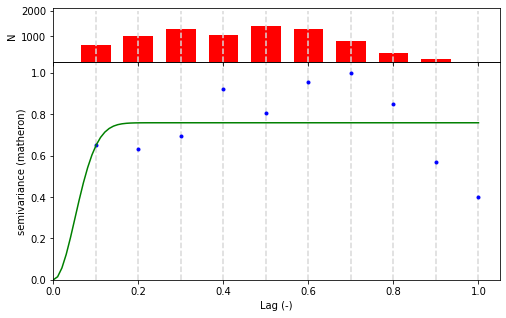

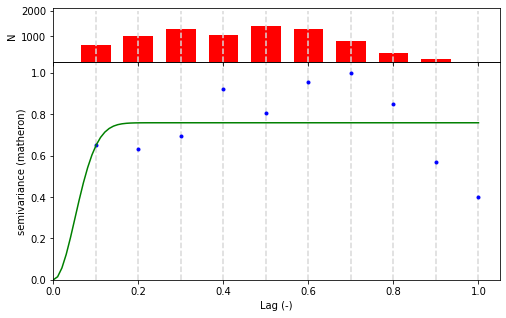

In [66]:
V.plot()

In [56]:
print(V)

gaussian Variogram
------------------
Estimator:         matheron
Effective Range:   225722839.92
Sill:              0.33
Nugget:            0.00
        
